# Exploratory data analysis

In [11]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('logins.json')
df['year'] = df['login_time'].dt.year
df['month'] = df['login_time'].dt.month
df['date'] = df['login_time'].dt.date
df['day_of_week'] = df['login_time'].dt.day_name()
df['time_of_day'] = df['login_time'].dt.strftime('%H:%M')
df['day_type'] = np.where(df['day_of_week'].isin(['Saturday','Sunday']),'Weekend','Weekday')
df.head()

,login_time,year,month,date,day_of_week,time_of_day,day_type
0,1970-01-01 20:13:18,1970,1,1970-01-01,Thursday,20:13,Weekday
1,1970-01-01 20:16:10,1970,1,1970-01-01,Thursday,20:16,Weekday
2,1970-01-01 20:16:37,1970,1,1970-01-01,Thursday,20:16,Weekday
3,1970-01-01 20:16:36,1970,1,1970-01-01,Thursday,20:16,Weekday
4,1970-01-01 20:26:21,1970,1,1970-01-01,Thursday,20:26,Weekday


In [3]:
df.tail()

,login_time,year,month,date,day_of_week,time_of_day,day_type
93137,1970-04-13 18:50:19,1970,4,1970-04-13,Monday,18:50,Weekday
93138,1970-04-13 18:43:56,1970,4,1970-04-13,Monday,18:43,Weekday
93139,1970-04-13 18:54:02,1970,4,1970-04-13,Monday,18:54,Weekday
93140,1970-04-13 18:57:38,1970,4,1970-04-13,Monday,18:57,Weekday
93141,1970-04-13 18:54:23,1970,4,1970-04-13,Monday,18:54,Weekday


In [4]:
# check data types and any missing fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 7 columns):
login_time     93142 non-null datetime64[ns]
year           93142 non-null int64
month          93142 non-null int64
date           93142 non-null object
day_of_week    93142 non-null object
time_of_day    93142 non-null object
day_type       93142 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.0+ MB


# Group into 15 min intervals and add more descriptive date columns

In [6]:
# aggregate into 15min intervals
grouped = df.groupby(pd.Grouper(freq='15min', key='login_time'))
df_grouped = grouped.login_time.count()
cleaned = pd.DataFrame(df_grouped)
cleaned.columns = {'login_count'}
cleaned = cleaned.reset_index()

# parse date into new columns
cleaned['year'] = cleaned['login_time'].dt.year
cleaned['month'] = cleaned['login_time'].dt.month
cleaned['date'] = cleaned['login_time'].dt.date
cleaned['day_of_week'] = cleaned['login_time'].dt.day_name()
cleaned['time_of_day'] = cleaned['login_time'].dt.strftime('%H:%M')
cleaned['day_type'] = np.where(cleaned['day_of_week'].isin(['Saturday','Sunday']),'Weekend','Weekday')
cleaned.head()

,login_time,login_count,year,month,date,day_of_week,time_of_day,day_type
0,1970-01-01 20:00:00,2,1970,1,1970-01-01,Thursday,20:00,Weekday
1,1970-01-01 20:15:00,6,1970,1,1970-01-01,Thursday,20:15,Weekday
2,1970-01-01 20:30:00,9,1970,1,1970-01-01,Thursday,20:30,Weekday
3,1970-01-01 20:45:00,7,1970,1,1970-01-01,Thursday,20:45,Weekday
4,1970-01-01 21:00:00,1,1970,1,1970-01-01,Thursday,21:00,Weekday


In [7]:
# generate dataframes with only one week of data
w1 = cleaned[(cleaned.date.astype(str) >='1970-01-05') & (cleaned.date.astype(str) <='1970-01-11')]
w2 = cleaned[(cleaned.date.astype(str) >='1970-01-12') & (cleaned.date.astype(str) <'1970-01-19')]
w2.head()

# generate dataframes with weekend/weekday split data
weekends = cleaned[(cleaned.day_of_week == 'Saturday') | (cleaned.day_of_week == 'Sunday')]
weekdays = cleaned[(cleaned.day_of_week != 'Saturday') & (cleaned.day_of_week != 'Sunday')]



,login_time,login_count,year,month,date,day_of_week,time_of_day,day_type
976,1970-01-12 00:00:00,4,1970,1,1970-01-12,Monday,00:00,Weekday
977,1970-01-12 00:15:00,10,1970,1,1970-01-12,Monday,00:15,Weekday
978,1970-01-12 00:30:00,7,1970,1,1970-01-12,Monday,00:30,Weekday
979,1970-01-12 00:45:00,7,1970,1,1970-01-12,Monday,00:45,Weekday
980,1970-01-12 01:00:00,5,1970,1,1970-01-12,Monday,01:00,Weekday


# Visualize logins

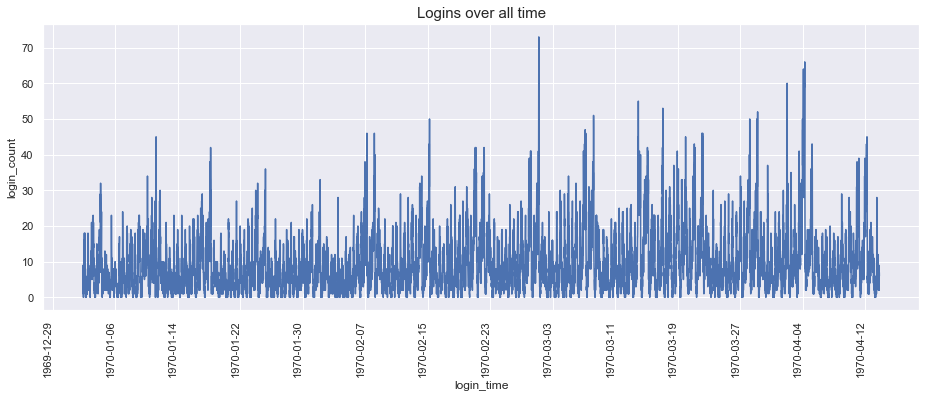

In [33]:
# generates a plot of logins by time of day
def plot_logins(data, x, hue, title, ci=95, rc={'figure.figsize':(11.7,5.27)}):
    sns.set(rc=rc)
    plt.tight_layout()
    
    #hue is the split by dimension, ci is confidence interval if data aggregation is performed
    ax = sns.lineplot(x=x, y="login_count", data=data, hue=hue, ci=ci) 
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.xticks(rotation=90,ha="right")
    plt.title(title, fontsize=15)
    
    plt.show()

plot_logins(cleaned, x="login_time", title="Logins over all time", hue=None, rc={'figure.figsize':(15.7,5.27)})


Spikes in logins can be seen, which means there are likely peak times when logins are high. This could be the difference between weekend vs. weekdays or work time vs. leisure times. To find peak times, plot the logins for a single day.

# Avg logins by day of week

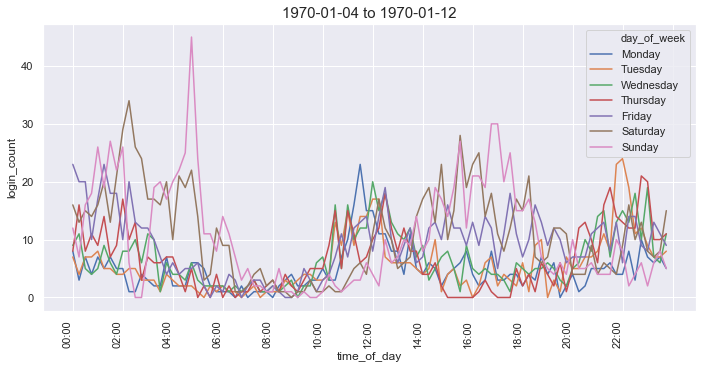

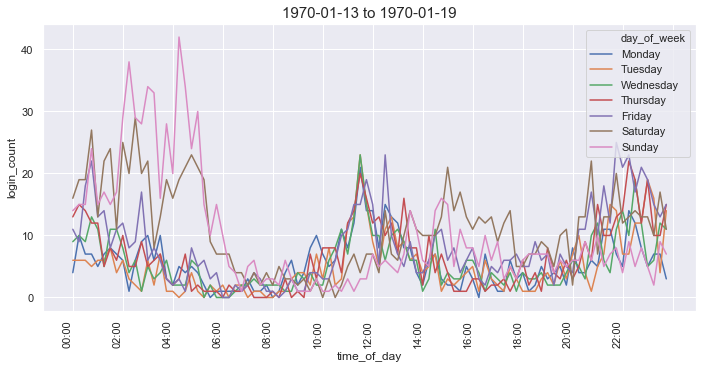

In [19]:
plot_logins(w1, x="time_of_day", hue="day_of_week", title='1970-01-04 to 1970-01-12')
plot_logins(w2, x="time_of_day", hue="day_of_week", title='1970-01-13 to 1970-01-19')

As suspected, there are different peak times for weekend versus weekdays. The Sunday spike seems to come later than the Saturday spike, and is the peak usage time of the week. Let's visualize the data split by day type.

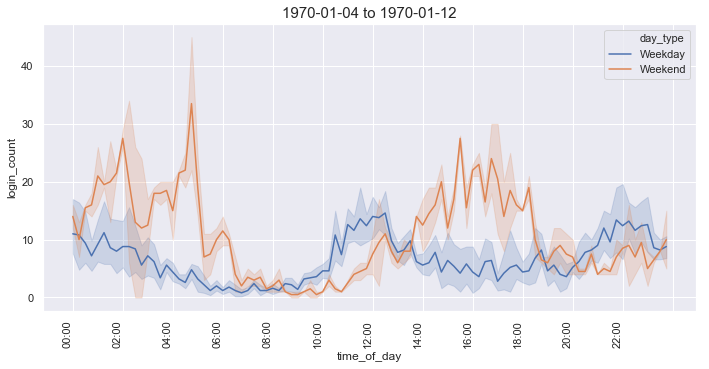

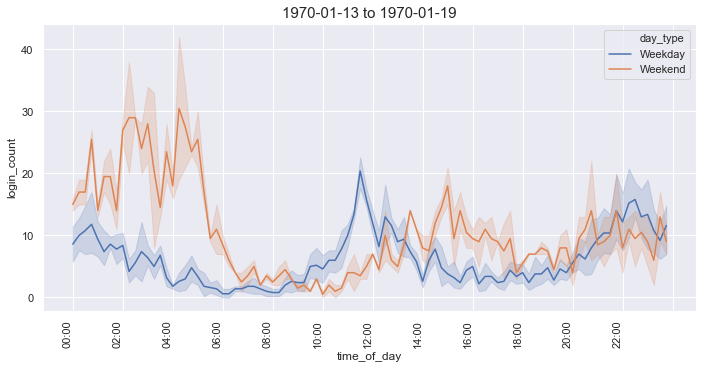

In [20]:
plot_logins(w1, x="time_of_day", hue="day_type", title='1970-01-04 to 1970-01-12')
plot_logins(w2, x="time_of_day", hue="day_type", title='1970-01-13 to 1970-01-19')

Knowing that there are weekday vs. weekend differences, we can also look at all data to see average logins on a typical weekday vs. weekend.

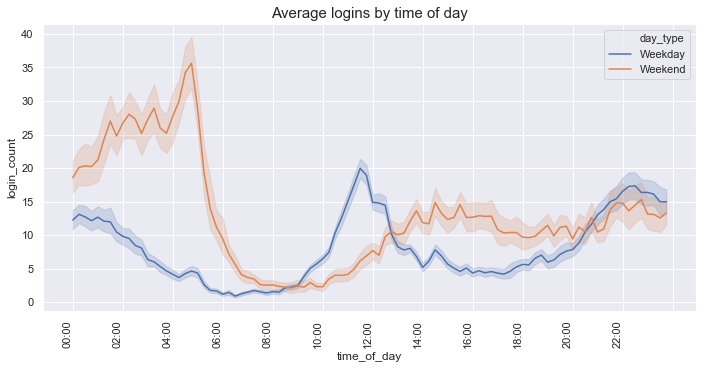

In [21]:
plot_logins(cleaned, x="time_of_day", hue="day_type", title='Average logins by time of day')

On weekends, logins go up until it peaks at 5AM, then it drops sharply. It rises again for a second smaller peak around 15:00. On Weekdays, logins go down starting at midnight and around 6:00, it starts rising again to peak at noon. Then it drops again before rising for a second peak in the evening at 22:00. The variance is higher for weekend days vs. the weekday days. Therefore, it might be interesting to see Saturday vs. Sunday breakdown of the data.

While weekday trends make sense, (users may login during lunch break and at night), the weekend trend is unusual, especially the rising use between 0:00 and 5:00AM when people should be sleeping. 

## Avg logins Saturday vs. Sunday vs. Weekdays

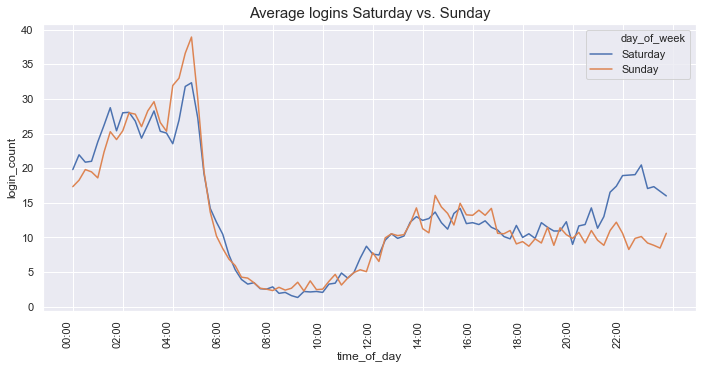

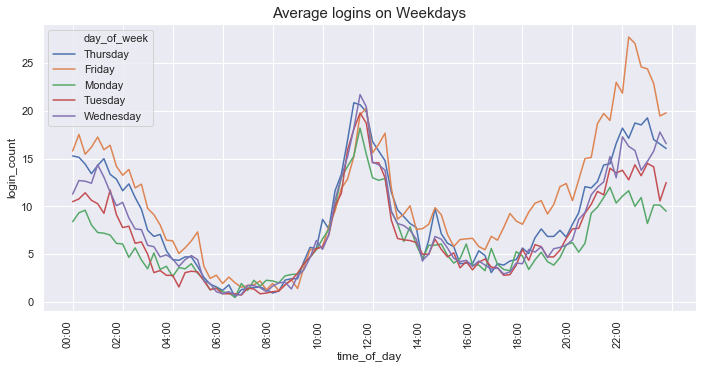

In [12]:
# plot saturday vs sunday logins
plot_logins(weekends,"day_of_week", 'Average logins Saturday vs. Sunday', ci=None)

# plot weekday logins
plot_logins(weekdays,"day_of_week", 'Average logins on Weekdays', ci=None)


Logins are higher on Saturday and Friday nights, which makes sense because the next day is a weekend. We don't see that increase on Sunday nights.

# Logins by month

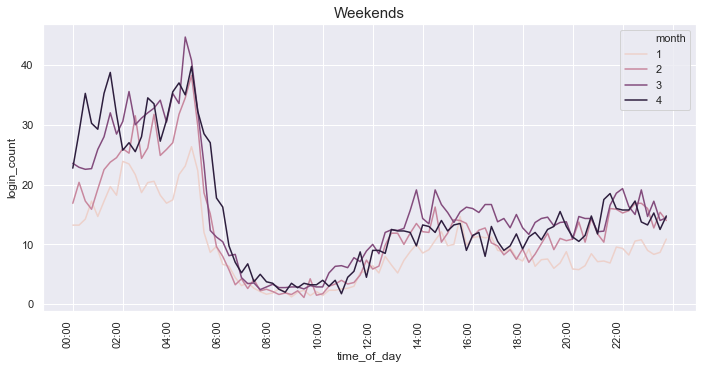

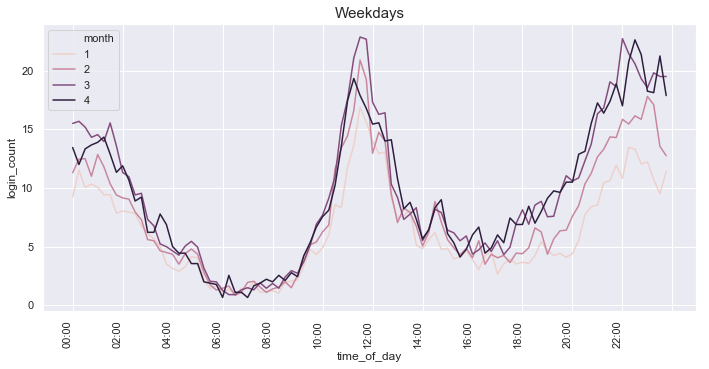

In [167]:
plot_logins(weekends,"month", "Weekends", ci=None)
plot_logins(weekdays,"month", "Weekdays", ci=None)

There is an increase in average logins over time. This increase tends to occur in the latest and earliest periods of the day.

In [228]:
# aggregate into day intervals
grouped2 = df.groupby(pd.Grouper(freq='1d', key='login_time'))
df_grouped2 = grouped2.login_time.count()
cleaned_day = pd.DataFrame(df_grouped2)
cleaned_day.columns = {'login_count'}
cleaned_day = cleaned_day.reset_index()

# parse date into new columns
cleaned_day['month'] = cleaned_day['login_time'].dt.month

cleaned_day.tail()

,login_time,login_count,month
98,1970-04-09,818,4
99,1970-04-10,1009,4
100,1970-04-11,1352,4
101,1970-04-12,1409,4
102,1970-04-13,395,4


In [229]:
cleaned_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
login_time     103 non-null datetime64[ns]
login_count    103 non-null int64
month          103 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.5 KB


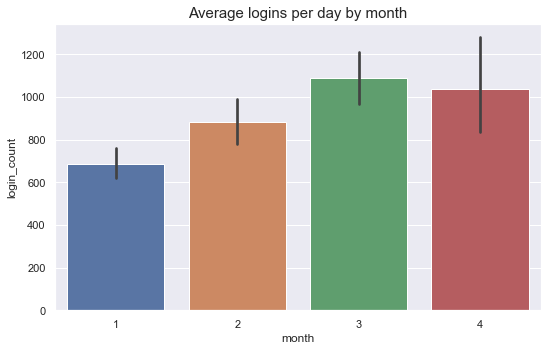

In [231]:
import numpy as np

# generate plot of logins by month
def plot_by_month(data, title, rc={'figure.figsize':(8.7,5.27)}):
    sns.set(rc=rc)
    plt.tight_layout()
    
    #hue is the split by dimension, ci is confidence interval if data aggregation is performed
    ax = sns.barplot(x="month", y="login_count", data=data) 
    plt.title(title, fontsize=15)
    
    plt.show()
    
# generates a plot of total logins by month - needs to be normalized because April does not have complete data
#plot_by_month(cleaned, title="Logins by month")

plot_by_month(cleaned_day, title="Average logins per day by month")

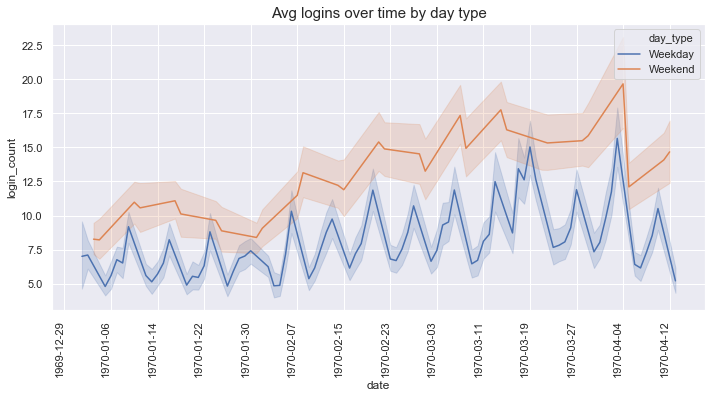

In [64]:
plot_logins(cleaned, x="date",hue="day_type",title='Avg logins over time by day type')



Based on the above charts, average logins increased from Jan through March, with no increase and even a little decrease in April. However, data is not available for the end of April so the final number could change. Looking at average logins over time, we see that on weekdays, the increase in logins is coming from more users during the peak hours, while logins around non-peak hours remaining roughly the same or increasing slightly. On weekends, the average logins look to be trending up for all hours of the day.

# Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?  
Avg wait time before pick up. If drivers were readily available when people needed a ride, the wait time should go down. If the wait time was longer in one city than another, we would also know which city was being underserved.


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 
    * how you will implement the experiment  
    * what statistical test(s) you will conduct to verify the significance of the  observation  
    * how you would interpret the results and provide recommendations to the city  operations team along with any caveats. 

**Q1)** Avg wait time before pick up. If drivers were readily available when people needed a ride, the wait time should go down. If the wait time was longer in one city than another, we would also know which city was being underserved.

**Q2)** I would implement an A/B test to compare the effectiveness of the proposed changed. In an A/B test, a test group will receive the treatment (toll reimbursement) while the control group does not. The city could approach one or two driving companies to offer the reimbursement, and see if average wait time for users calling for a ride with those companies is shorter than the wait time for users calling for rides with non-reimbursed companies. Of course, this makes some assumptions such as that users don’t switch between ride share companies and that the customer base are comparable across ride share companies. 

If the city must, in the name of fairness, reimburse all companies at once, then a pre vs. post analysis could be conducted measuring wait time before the change and after the change. Another option is for the city to offer free toll on certain days of the week. The limitations of this approach is that without a control group, the observed changes could be due to seasonal or temporal effects.

Assuming an A/B test is conducted, a frequentist or bayesian approach could be used to analyze results. In a frequentist approach, I would calculate whether the difference between test and control group is statistically significant. If a significant difference was found, I would explain that that we can be almost a hundred percent confident the observed reduction in wait time is due to implementing toll reimbursement. There is, however, a small probability that the observed effect is due to random chance. (For example, 5% based on a p-value of 0.05.) In a bayesian approach, I would calculate the probability of seeing the difference between test group and control group. I would then explain that there is a X% probability that implementing tolls reduced wait time and the city can make a decision accordingly. (For example, a probability of 80% means there is likely an effect, but a probability of 50% is not certain)
